# Stock Analysis Models Experiments

This notebook demonstrates the usage of different models in the stock analysis system:
1. StockData - For fetching and visualizing historical stock data
2. StockModelHoldout - For holdout validation forecasting
3. StockHyperopt - For hyperparameter-optimized forecasting

## Setup

In [1]:
# Install required packages
!pip install seaborn matplotlib pandas yfinance prophet hyperopt scikit-learn

import sys
import os

# Add the project root to the Python path
sys.path.append(os.path.abspath('..'))

from models.stock_data import StockData
from models.stock_model_holdout import StockModelHoldout
from models.stock_hyperopt import StockHyperopt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('default')  # Use default style instead of seaborn
sns.set_theme()  # This will set the seaborn theme
plt.rcParams['figure.figsize'] = [15, 8]  # Set default figure size
plt.rcParams['font.size'] = 12  # Set default font size

c:\Users\mingl\anaconda3\envs\google_ai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## 1. StockData Examples

Let's start by fetching and visualizing historical stock data for different companies.

[*********************100%***********************]  1 of 1 completed

Successfully fetched closing prices for AAPL


[*********************100%***********************]  1 of 1 completed


Successfully fetched closing prices for GOOGL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Successfully fetched closing prices for MSFT
Successfully fetched closing prices for AMZN


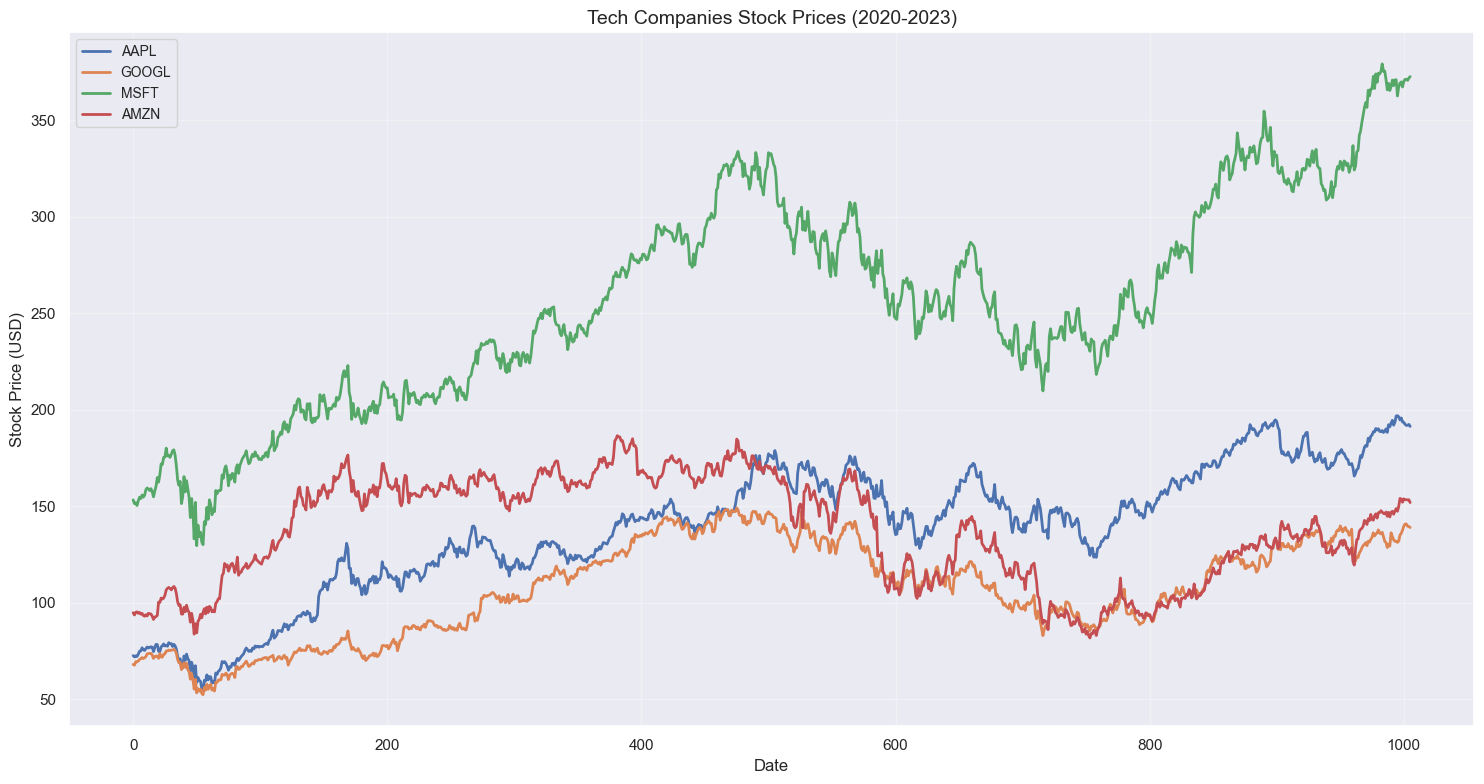

In [3]:
# Initialize StockData for different companies
tech_companies = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
start_date = '2020-01-01'
end_date = '2023-12-31'

# Fetch and plot data for each company
plt.figure()
for ticker in tech_companies:
    stock_data = StockData(ticker, start_date, end_date)
    stock_data.fetch_closing_prices()
    df = stock_data.dataframe
    plt.plot(df.index, df['Close'], label=ticker, linewidth=2)

plt.title('Tech Companies Stock Prices (2020-2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. StockModelHoldout Examples

Now let's demonstrate the holdout validation model for forecasting.

[*********************100%***********************]  1 of 1 completed
23:10:17 - cmdstanpy - INFO - Chain [1] start processing
23:10:17 - cmdstanpy - INFO - Chain [1] done processing


Successfully fetched closing prices for AAPL
        Date      Close
0 2020-01-02  72.716064
1 2020-01-03  72.009125
2 2020-01-06  72.582901
3 2020-01-07  72.241554
4 2020-01-08  73.403633

Model Performance Metrics:
MAE: 57.2518
MSE: 3491.3970
RMSE: 59.0880
R2: -27.7410


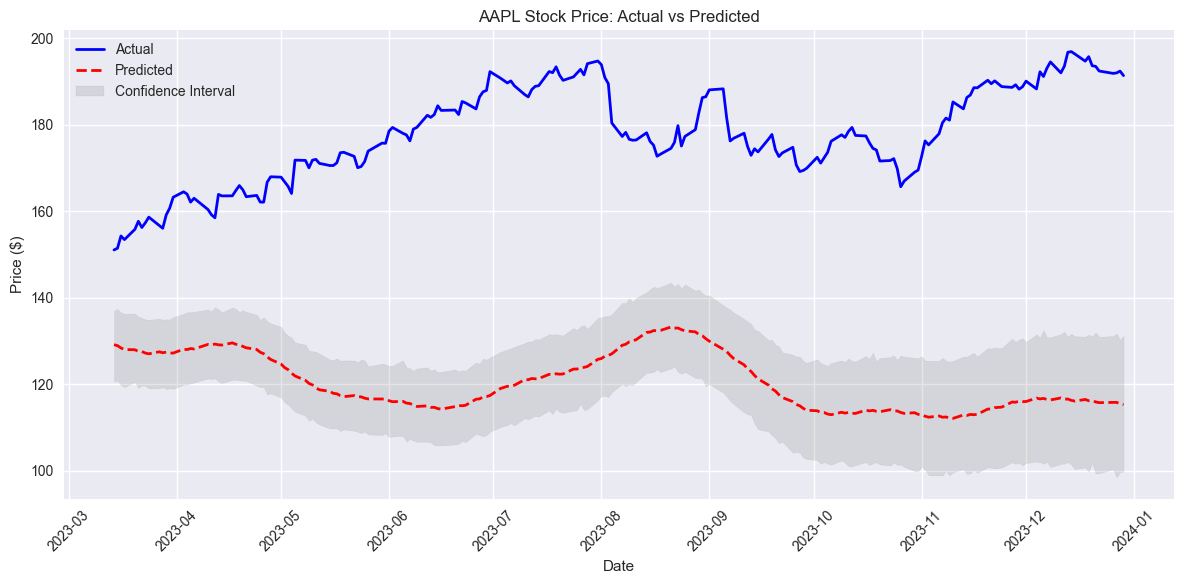

In [11]:
## 2. StockModelHoldout Examples

# Example with Apple stock
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-12-31'
forecast_days = 30

# Create StockData object
stock_data = StockData(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date
)

# Fetch the data
stock_data.fetch_closing_prices()
print(stock_data.dataframe.head())

# Create and run the model
model = StockModelHoldout(stock_data)
metrics = model.run_analysis()

# Print the results
print("\nModel Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")
    
# Create visualization
model.visualize_forecast() 

## 3. StockHyperopt Examples

Finally, let's demonstrate the hyperparameter-optimized forecasting model.

[*********************100%***********************]  1 of 1 completed
23:13:28 - cmdstanpy - INFO - Chain [1] start processing


Successfully fetched closing prices for GOOGL


23:13:28 - cmdstanpy - INFO - Chain [1] done processing
23:13:28 - cmdstanpy - INFO - Chain [1] start processing
23:13:28 - cmdstanpy - INFO - Chain [1] done processing
23:13:28 - cmdstanpy - INFO - Chain [1] start processing
23:13:29 - cmdstanpy - INFO - Chain [1] done processing
23:13:29 - cmdstanpy - INFO - Chain [1] start processing
23:13:29 - cmdstanpy - INFO - Chain [1] done processing
23:13:29 - cmdstanpy - INFO - Chain [1] start processing
23:13:29 - cmdstanpy - INFO - Chain [1] done processing
23:13:29 - cmdstanpy - INFO - Chain [1] start processing
23:13:30 - cmdstanpy - INFO - Chain [1] done processing
23:13:30 - cmdstanpy - INFO - Chain [1] start processing
23:13:30 - cmdstanpy - INFO - Chain [1] done processing
23:13:30 - cmdstanpy - INFO - Chain [1] start processing
23:13:30 - cmdstanpy - INFO - Chain [1] done processing
23:13:31 - cmdstanpy - INFO - Chain [1] start processing
23:13:31 - cmdstanpy - INFO - Chain [1] done processing
23:13:31 - cmdstanpy - INFO - Chain [1] 


Best Hyperparameters:
changepoint_prior_scale: 0.14087543849241133
seasonality_prior_scale: 0.2510808485240852
holidays_prior_scale: 0.10078160208615622
seasonality_mode: additive


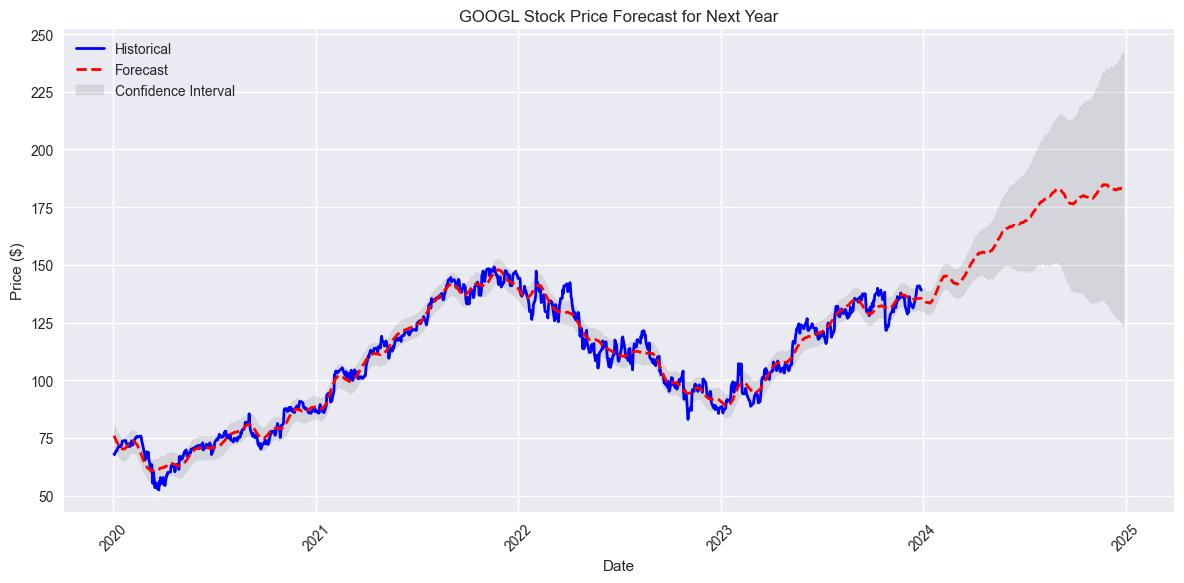

Visualization saved to stock_forecast_next_year.png


In [12]:
# Example with Google stock
ticker = 'GOOGL'
start_date = '2020-01-01'
end_date = '2023-12-31'

# Create StockData object
stock_data = StockData(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date
)

# Fetch the data
stock_data.fetch_closing_prices()

# Create and run the model
model = StockHyperopt(stock_data)
best_params = model.run_analysis()

# Print the best parameters
print("\nBest Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")
    
# Create visualization
model.visualize_forecast()
model.visualize_forecast("stock_forecast_next_year.png") 

## 4. Model Comparison

Let's compare the performance of both forecasting models for the same stock.